<a href="https://colab.research.google.com/github/manshakhanna2004/Unified-Mentor/blob/main/Data_Science_job_salaries(UnifiedMentor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load dataset
df = pd.read_csv('Data Science Job Salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [7]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
df.shape

(607, 12)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


In [10]:
print(df.describe())

       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000


In [11]:
# check for missing values
print(df.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [12]:
# Drop the unnamed index column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Check for missing values
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [13]:
# Convert categorical abbreviations to full names
df['experience_level'] = df['experience_level'].map({
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive'
})

# Convert employment_type to full names
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

# Standardize company_size
df['company_size'] = df['company_size'].map({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

# Convert work_year to datetime if needed
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

# Drop rows with missing values in relevant columns
df.dropna(subset=['experience_level', 'employment_type', 'company_size'], inplace=True)

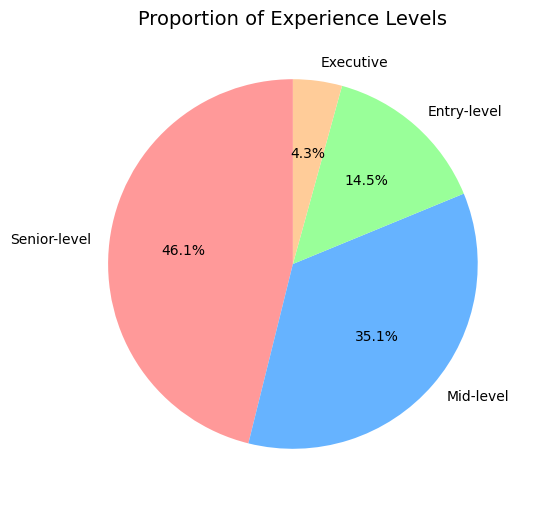

In [14]:
#Exploratory Data Analysis(EDA)

# pie chart
plt.figure(figsize=(6, 6))
exp_counts = df['experience_level'].value_counts()
plt.pie(exp_counts, labels=exp_counts.index, autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=90)
plt.title('Proportion of Experience Levels', fontsize=14)
plt.show()

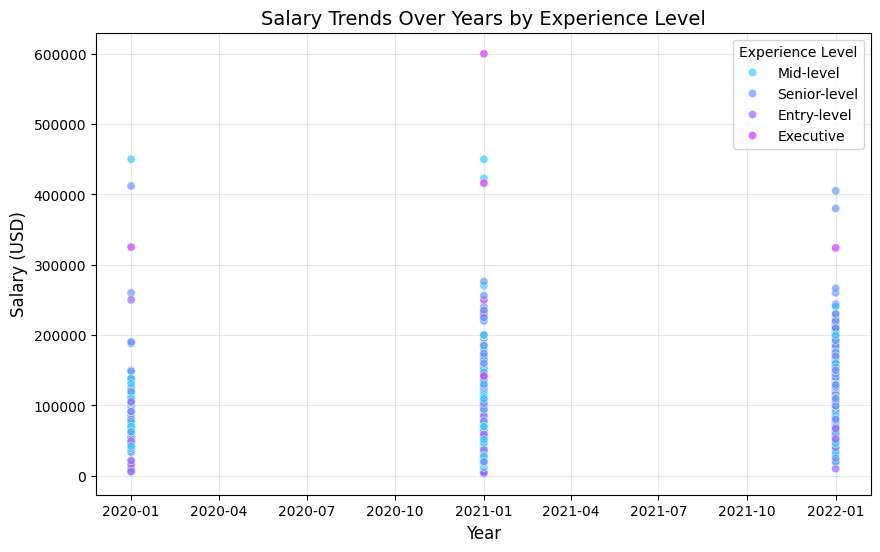

In [15]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='work_year', y='salary_in_usd', hue='experience_level',
                palette='cool', alpha=0.7)
plt.title('Salary Trends Over Years by Experience Level', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.legend(title='Experience Level')
plt.grid(alpha=0.3)
plt.show()

/tmp/ipython-input-3807941908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='job_title', y='salary_in_usd', palette='pastel')


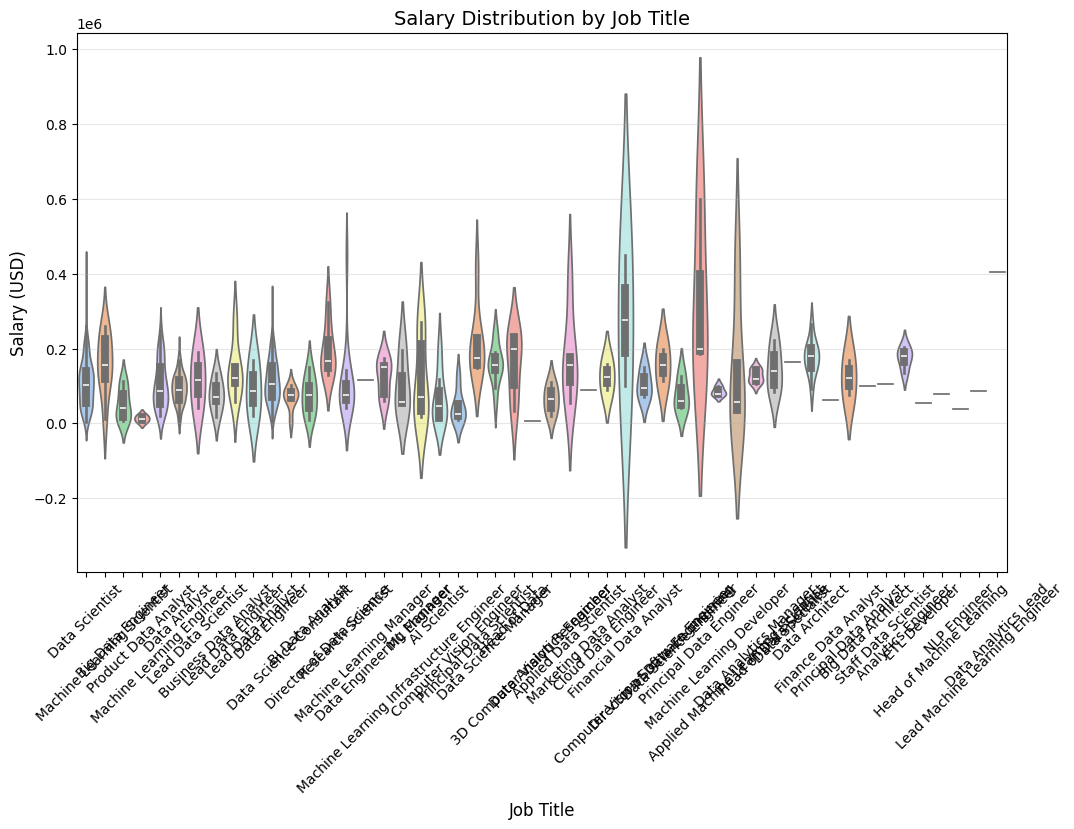

In [16]:
# Violin Plo
plt.figure(figsize=(12, 7))
sns.violinplot(data=df, x='job_title', y='salary_in_usd', palette='pastel')
plt.title('Salary Distribution by Job Title', fontsize=14)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

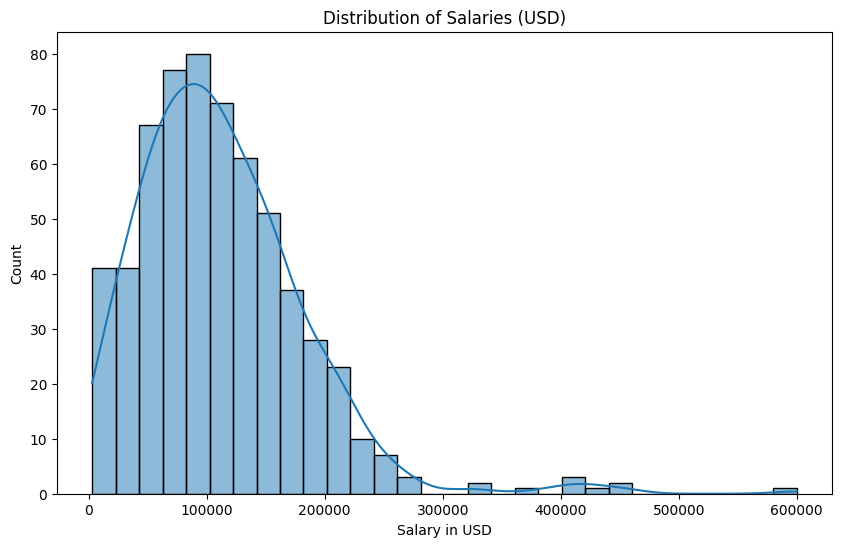

In [17]:
# Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.show()

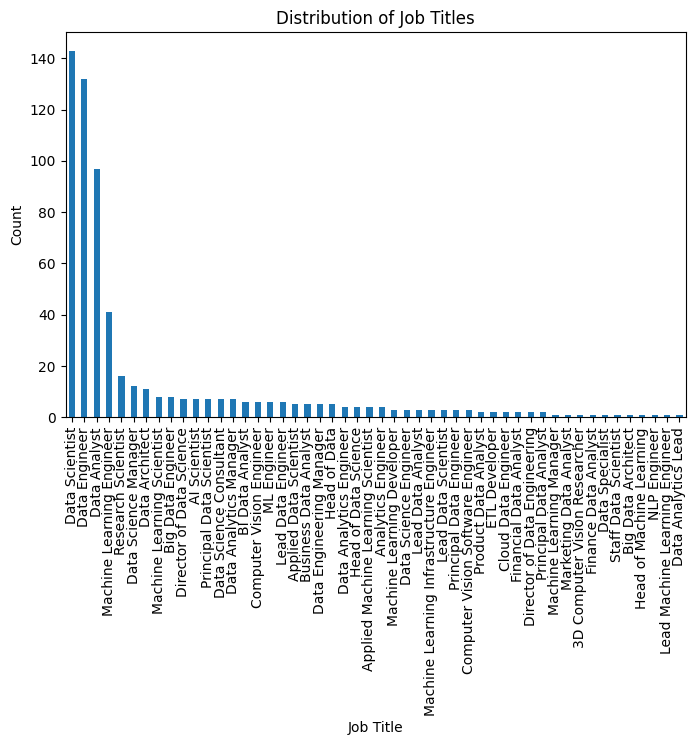

In [18]:
# Job Types
plt.figure(figsize=(8, 5))
df['job_title'].value_counts().plot(kind='bar')
plt.title('Distribution of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

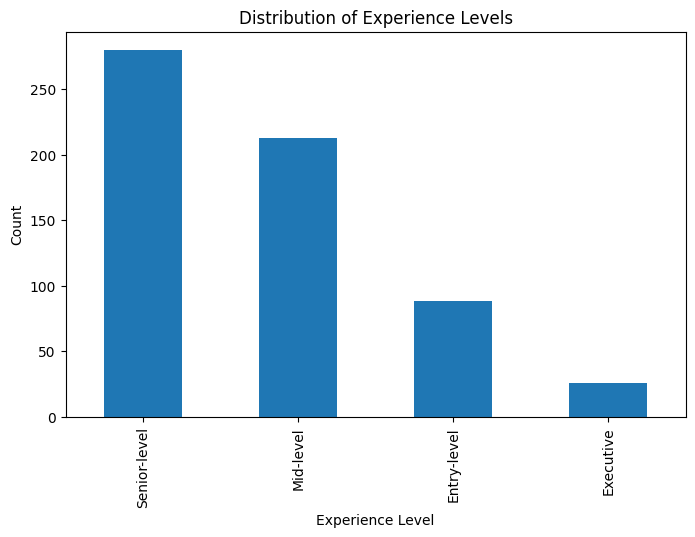

In [19]:
# Drop rows with missing experience_level before plotting
df_cleaned = df.dropna(subset=['experience_level'])
# Experience Levels
plt.figure(figsize=(8, 5))
df_cleaned['experience_level'].value_counts().plot(kind='bar')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

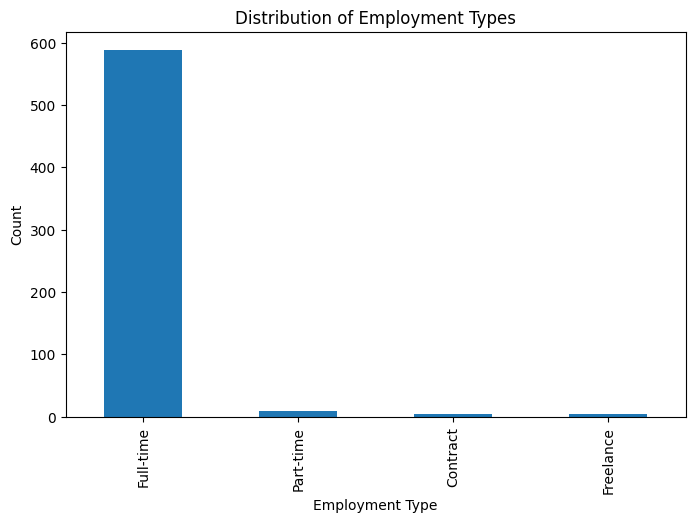

In [20]:
# Employment Types
plt.figure(figsize=(8, 5))
df['employment_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

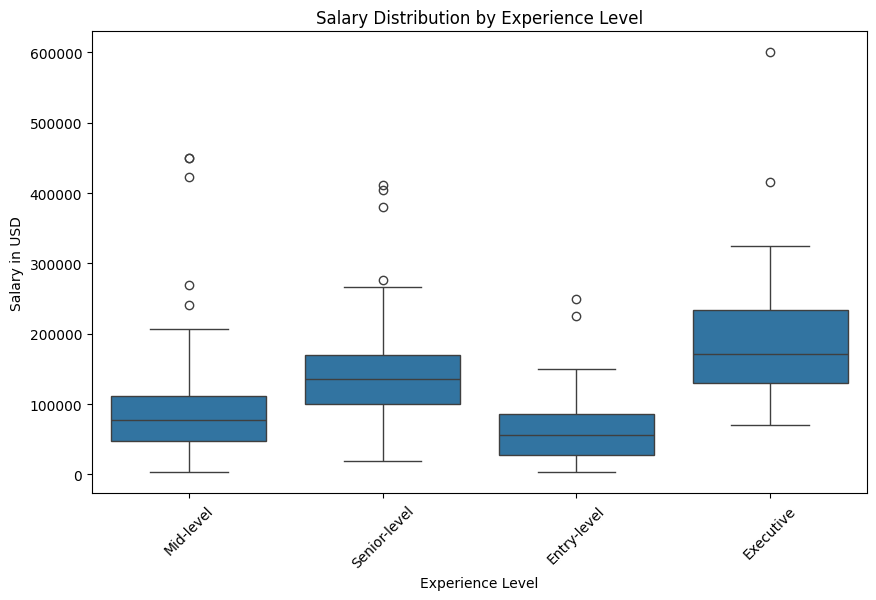

In [21]:
# Salary by Experience Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

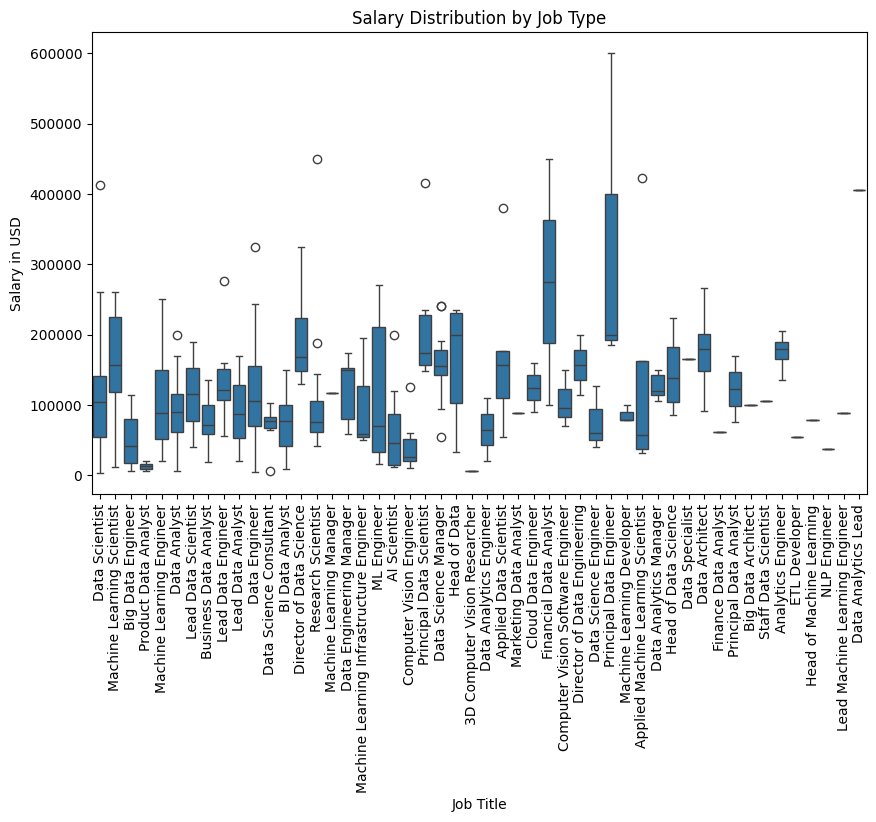

In [22]:
# Salary by Job Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Type')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90) # Rotate labels for better readability
plt.show()

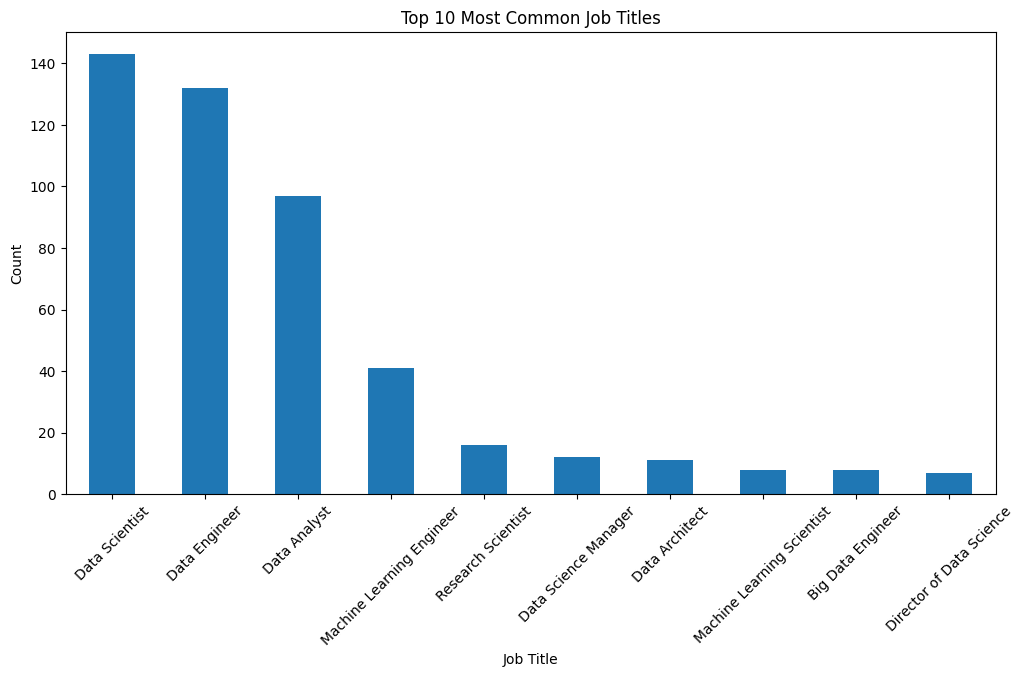

In [23]:
# Top 10 Job Titles by Count
plt.figure(figsize=(12, 6))
df['job_title'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

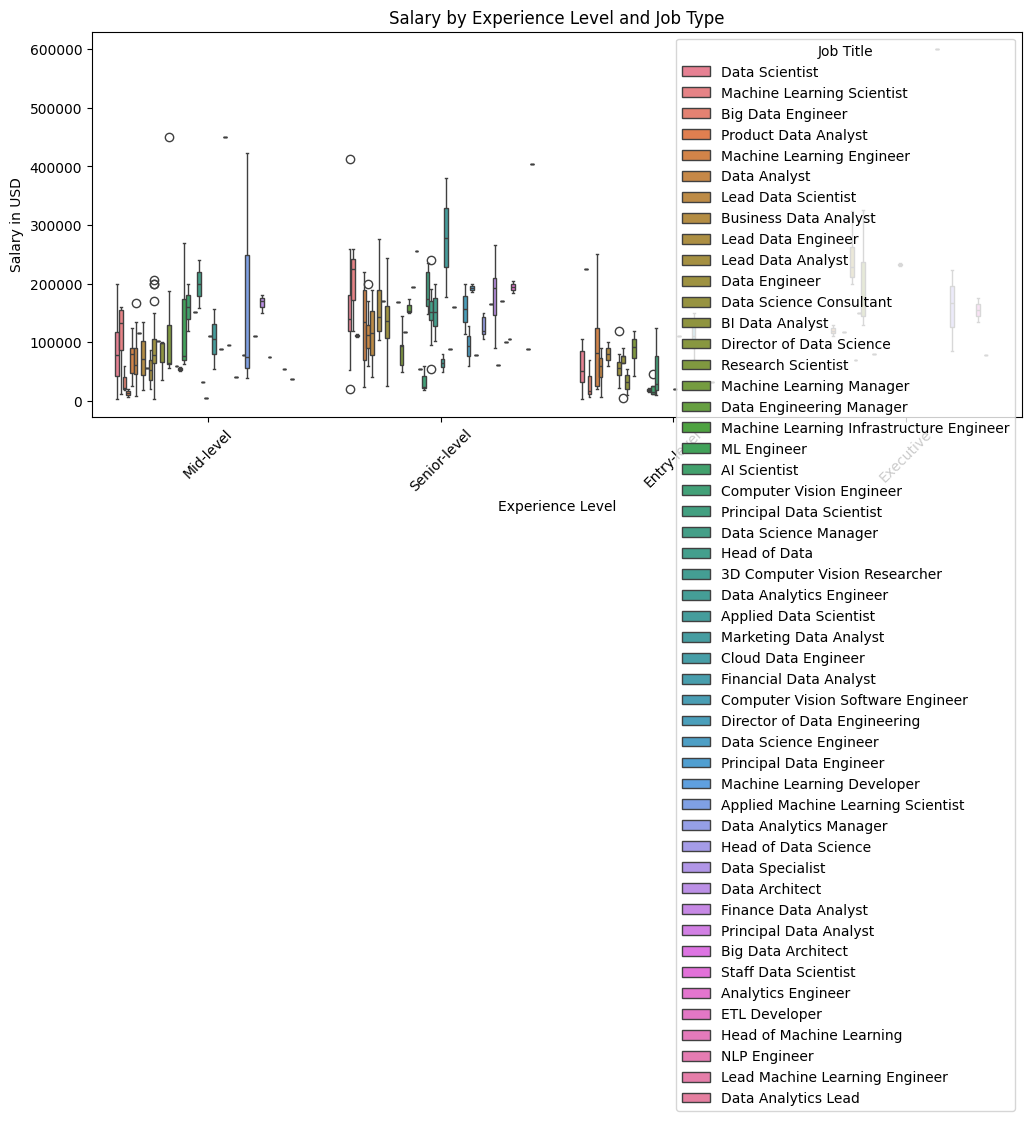

In [24]:
# Salary by Experience Level and Job Type
plt.figure(figsize=(12, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', hue='job_title', data=df)
plt.title('Salary by Experience Level and Job Type')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.legend(title='Job Title')
plt.xticks(rotation=45)
plt.show()

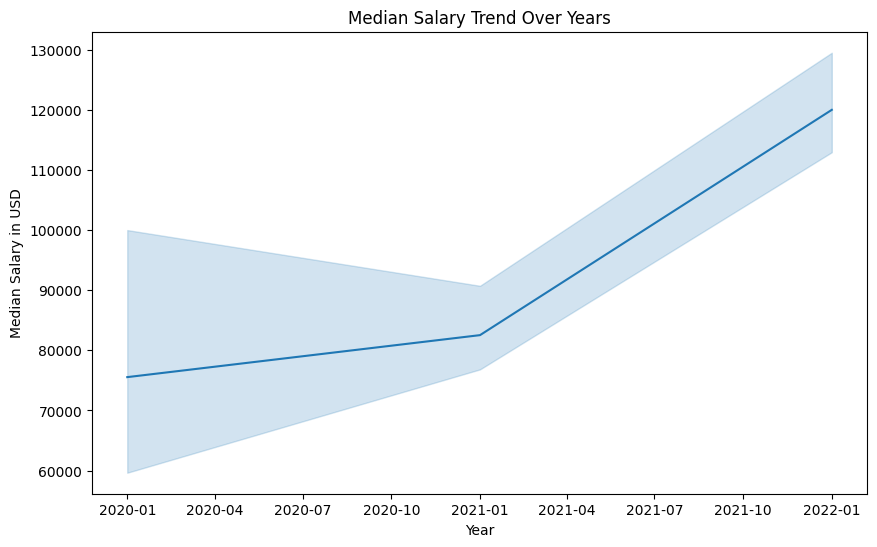

In [25]:
# Salary Trends Over Years
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=df, estimator='median')
plt.title('Median Salary Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Median Salary in USD')
plt.show()

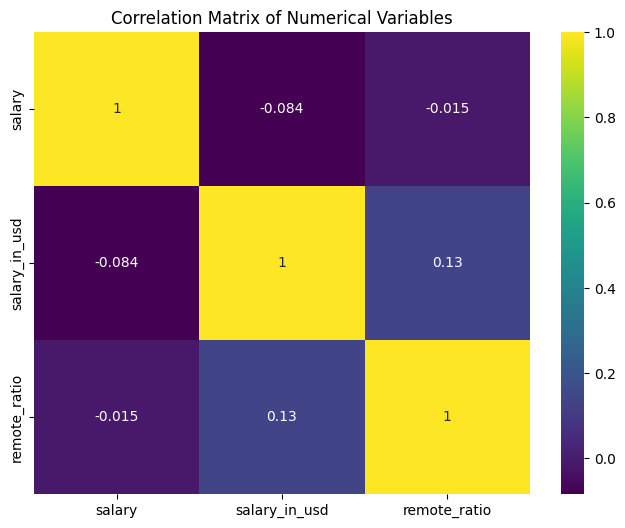

In [26]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

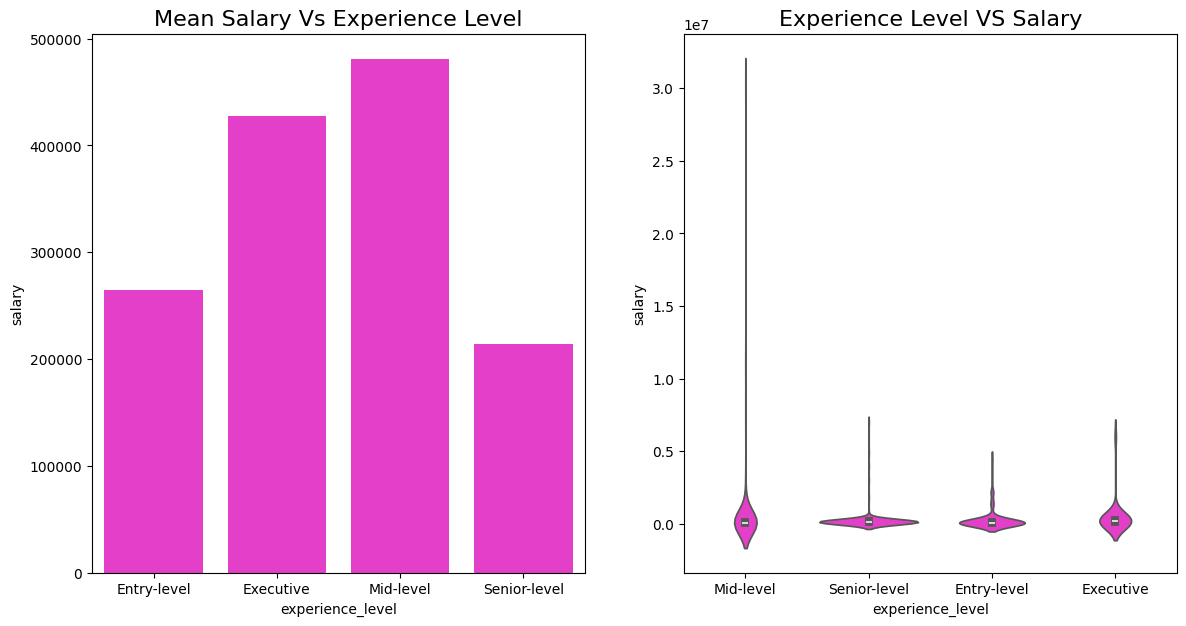

In [27]:
# Calculate mean salary by experience level
mean_s_exp_lv = df.groupby('experience_level')['salary'].mean()

plt.figure(figsize=(14, 7))
sns.set_palette('spring')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_exp_lv.index, y=mean_s_exp_lv)
ax.set_title('Mean Salary Vs Experience Level',
fontdict={'fontsize': 16})
plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='experience_level', y='salary')
ax.set_title('Experience Level VS Salary',
fontdict={'fontsize': 16})
plt.show()

Text(0.5, 1.0, 'Company Size VS Job Types Counts')

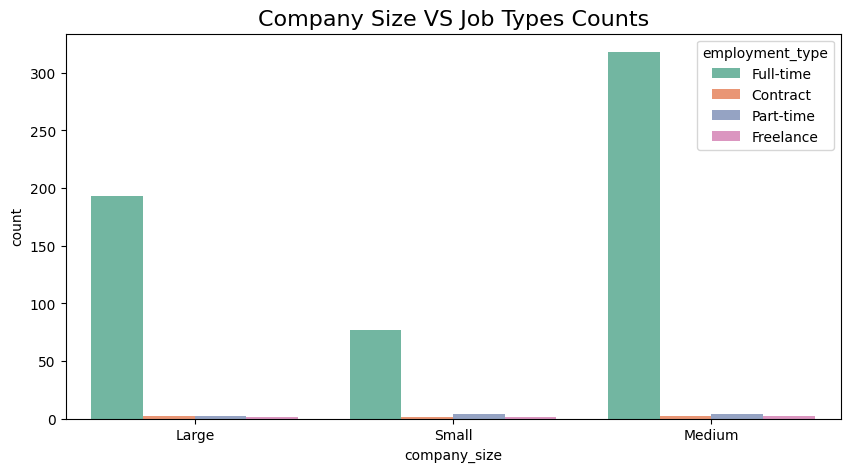

In [28]:
plt.figure(figsize=(10, 5))
sns.set_palette('Set2')
ax = sns.countplot(data=df, x='company_size', hue='employment_type')
ax.set_title('Company Size VS Job Types Counts',
fontdict={'fontsize': 16})

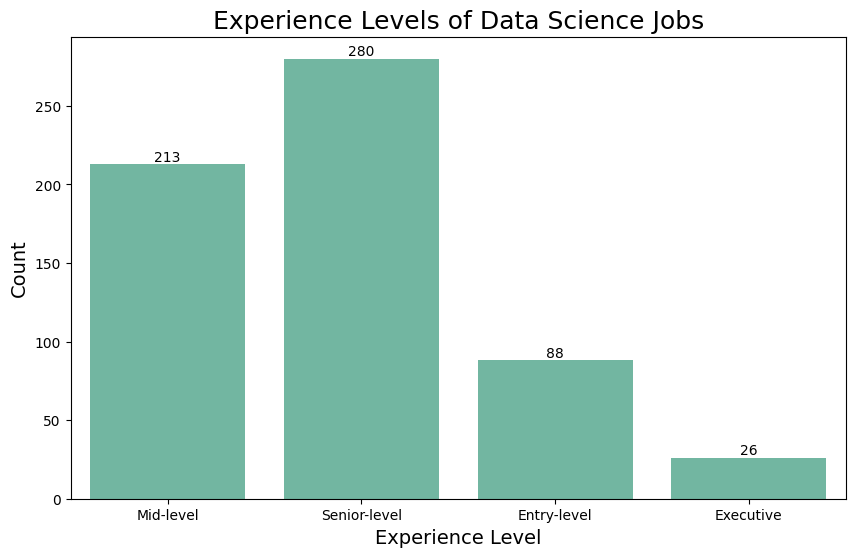

In [29]:
plt.figure(figsize=(10,6))
plt.title('Experience Levels of Data Science Jobs', fontsize=18)
ax = sns.countplot (x='experience_level', data=df)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

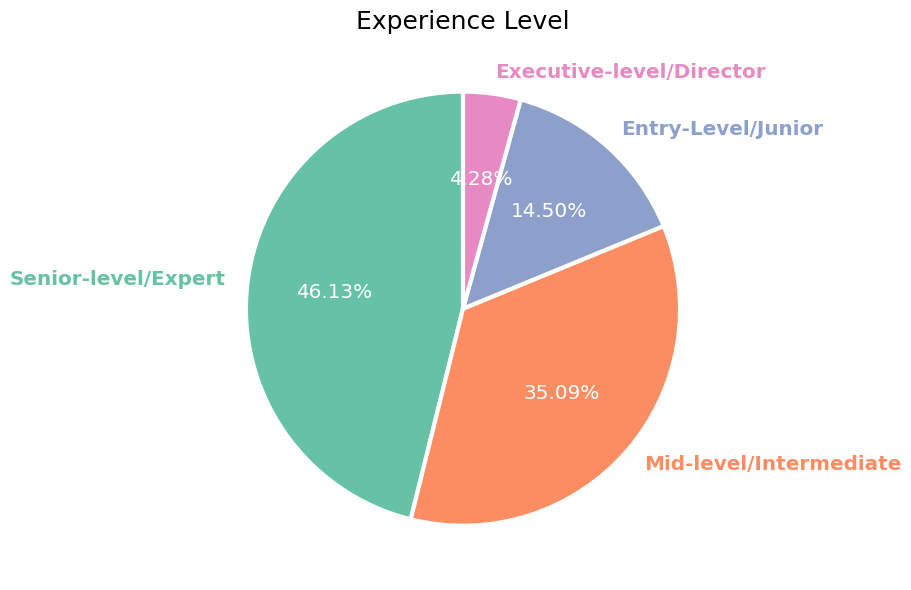

In [30]:
# Calculate the counts for each experience level
experience_ratio = df['experience_level'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
x=experience_ratio

labels = ['Senior-level/Expert','Mid-level/Intermediate','Entry-Level/Junior','Executive-level/Director']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Experience Level', fontsize=18)
plt.tight_layout()
plt.show()

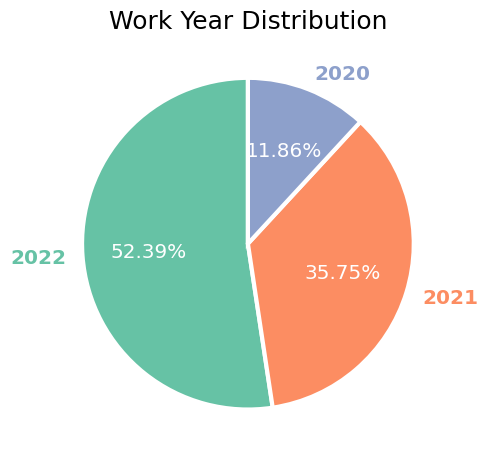

In [31]:
year_ratio = df['work_year'].value_counts()

fig, ax = plt.subplots(figsize=(5, 5))
x = year_ratio
labels = ['2022','2021','2020']


patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Work Year Distribution', fontsize=18)
plt.tight_layout()

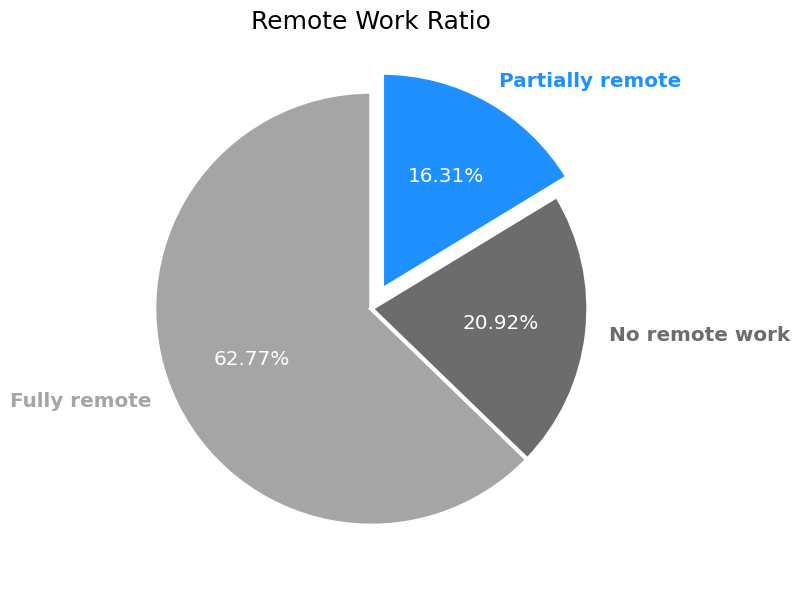

In [32]:
import numpy as np
remote_work_ratio = df['remote_ratio'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

x=remote_work_ratio

cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45,0.85, len(x))))

colors[2]='dodgerblue'
labels = ['Fully remote','No remote work','Partially remote']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the wedge to highlight it.
    explode=(0, 0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Remote Work Ratio', fontsize=18)
plt.tight_layout()
plt.show()

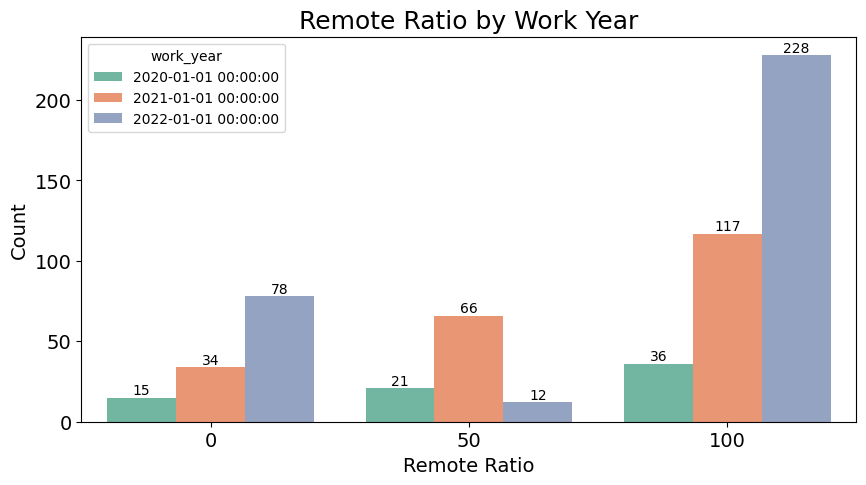

In [33]:
plt.figure(figsize=(10,5))
plt.title("Remote Ratio by Work Year", fontsize=18)
ax = sns.countplot(x='remote_ratio', data=df, hue = 'work_year')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Remote Ratio", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [34]:
#Data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features and target variable
features = ['work_year', 'remote_ratio', 'salary_in_usd']
target = 'experience_level'

X = df[features]
y = df[target]

# Convert categorical features to numerical using Label Encoding
categorical_features = ['work_year', 'remote_ratio']
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation complete.")

Data preparation complete.


/tmp/ipython-input-345743022.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-345743022.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


In [35]:
# Encode categorical variables for modeling
df_model = df.copy()

# Convert categorical variables to numerical codes
df_model['experience_level'] = df_model['experience_level'].map({
    'Entry-level': 0,
    'Mid-level': 1,
    'Senior-level': 2,
    'Executive': 3
})

df_model['employment_type'] = df_model['employment_type'].map({
    'Part-time': 0,
    'Freelance': 1,
    'Full-time': 2,
    'Contract': 3
})

# Encode remote_ratio
df_model['remote_ratio'] = df_model['remote_ratio'].map({
    0: 0,   # Onsite
    50: 1,  # Hybrid
    100: 2  # Remote
  })

df_model['company_size'] = df_model['company_size'].map({
    'Small': 0,
    'Medium': 1,
    'Large': 2
})

# One-hot encode job titles (simplified version)
top_jobs = df['job_title'].value_counts()[:10].index  # Use top 10 most common jobs
for job in top_jobs:
    df_model[f'job_{job.lower().replace(" ", "_")}'] = (df_model['job_title'] == job).astype(int)

Mean Squared Error: 2813025025.03
Mean Absolute Error: 39160.39
R-squared: 0.27


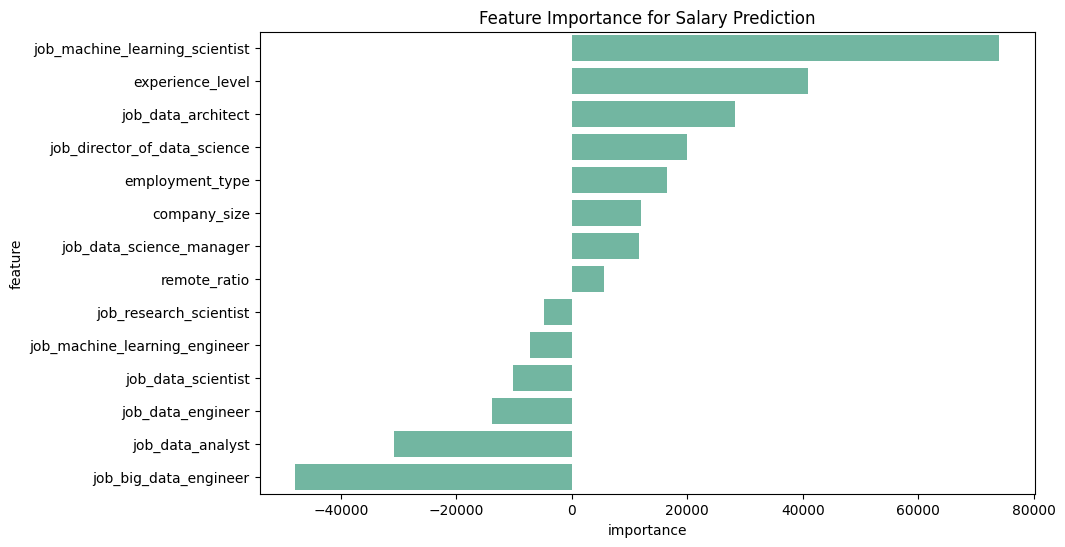

In [36]:
#Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select features and target
features = ['experience_level', 'employment_type', 'remote_ratio', 'company_size'] + \
           [col for col in df_model.columns if col.startswith('job_')]
target = 'salary_in_usd' # Predicting salary in USD as it is standardized

# Exclude the original 'job_title' column from features
features.remove('job_title')

X = df_model[features]
y = df_model[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
importance = pd.DataFrame({
    'feature': features,
    'importance': model.coef_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance)
plt.title('Feature Importance for Salary Prediction')
plt.show()
